# Simple Linear Regression

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import and Explore the dataset

In [2]:
original_data = pd.read_csv("Advertising.csv")

In [3]:
# To read the top 5 entries of the database
original_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data = original_data.drop(columns="Unnamed: 0")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# First, we will check effect of TV ads on sales (Simple Linear Regression)

x = data.iloc[:,:1].values
y = data.iloc[:,-1].values

In [8]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [9]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

Text(0.5, 1.0, 'Money spent on TV vs Sales')

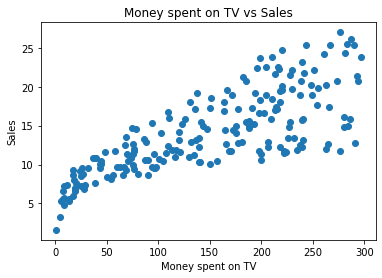

In [10]:
plt.scatter(x,y)
plt.xlabel("Money spent on TV")
plt.ylabel("Sales")
plt.title("Money spent on TV vs Sales")

## Split the Dataset into training set and test set

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=101 )

In [12]:
x.shape

(200, 1)

In [13]:
x_train.shape

(160, 1)

## Option1 - Train the simple linear regression model on training set using scikit

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the test set results

In [15]:
coefficient = lr.coef_.round(2)
coefficient

array([0.05])

In [16]:
intercept = lr.intercept_.round(2)
intercept

7.12

In [17]:
print("The equation of our simple regression model is Sales = {}xMoney Spent + {}".format(coefficient, intercept))

The equation of our simple regression model is Sales = [0.05]xMoney Spent + 7.12


In [18]:
y_test_pred = lr.predict(x_test)
y_test_pred

array([10.60923129, 19.04385745, 12.39231219, 12.24761191,  8.59276283,
        8.02796495, 19.38460328, 17.08340201, 13.67127598, 17.41481233,
        8.89616665, 15.32365986, 17.5034996 , 16.4065781 , 16.16385505,
        9.20890597, 19.39393878, 11.58945901,  9.45629677, 17.76489366,
        8.03730045, 15.11827881, 20.04742393, 19.31925476, 10.34316948,
       16.44858786, 20.82693836,  9.90440088, 14.852217  ,  7.92527443,
        8.233346  , 17.38213807, 13.39121092,  7.73856438, 15.38434062,
       11.65947527, 11.19270017, 11.51944274,  7.66854812, 14.4321194 ])

## Compare the (predicted) test set results with (given) y_test

In [19]:
y_train_pred = lr.predict(x_train)
y_train_pred

array([10.28715646, 13.63393397, 11.61279776,  7.99995844, 10.68858305,
       10.35250498,  7.3744798 , 17.72755165, 15.56171516, 16.24320682,
        9.19957047, 16.77999819, 20.20145971, 12.59302549, 16.44858786,
        7.31379904, 19.58064882,  8.96618291, 19.51996806, 15.29565335,
       16.14051629, 20.54687329, 10.86595759, 15.64573468, 17.5034996 ,
       18.83380865, 15.88845773, 10.77260257, 12.98978433, 13.24184288,
       18.06829748, 10.03043015, 20.47218928, 10.68858305, 11.67347853,
       17.22343454, 11.1226839 , 18.47439182,  7.46316707, 17.95627145,
       20.22479847, 13.26984939,  9.74569734, 16.69131092, 14.90823001,
       18.32969154,  7.92527443, 16.77533044, 18.24100427, 15.38434062,
        8.45739805, 18.20366226,  9.37694501, 10.41785349, 16.34589734,
       13.71795349, 11.30939394, 12.74706127, 13.47989819, 10.63723779,
       13.62459847, 20.64489606, 12.53701247,  8.84482139, 17.77889691,
       18.20366226,  7.73389663, 16.34589734, 20.95763539, 15.06

In [20]:
y_test_pred_rounded = [round (elem,2) for elem in y_test_pred.tolist()]
y_test_pred_rounded

[10.61,
 19.04,
 12.39,
 12.25,
 8.59,
 8.03,
 19.38,
 17.08,
 13.67,
 17.41,
 8.9,
 15.32,
 17.5,
 16.41,
 16.16,
 9.21,
 19.39,
 11.59,
 9.46,
 17.76,
 8.04,
 15.12,
 20.05,
 19.32,
 10.34,
 16.45,
 20.83,
 9.9,
 14.85,
 7.93,
 8.23,
 17.38,
 13.39,
 7.74,
 15.38,
 11.66,
 11.19,
 11.52,
 7.67,
 14.43]

In [21]:
x_test_rounded = [round (elem,2) for elem in x_test.flatten().tolist()]
x_test_rounded

[74.7,
 255.4,
 112.9,
 109.8,
 31.5,
 19.4,
 262.7,
 213.4,
 140.3,
 220.5,
 38.0,
 175.7,
 222.4,
 198.9,
 193.7,
 44.7,
 262.9,
 95.7,
 50.0,
 228.0,
 19.6,
 171.3,
 276.9,
 261.3,
 69.0,
 199.8,
 293.6,
 59.6,
 165.6,
 17.2,
 23.8,
 219.8,
 134.3,
 13.2,
 177.0,
 97.2,
 87.2,
 94.2,
 11.7,
 156.6]

In [22]:
data = {"x_test":x_test_rounded, "y_test":y_test,"y_test_predict":y_test_pred_rounded}
summary=pd.DataFrame(data)
summary

,x_test,y_test,y_test_predict
0,74.7,14.7,10.61
1,255.4,19.8,19.04
2,112.9,11.9,12.39
3,109.8,16.7,12.25
4,31.5,9.5,8.59
5,19.4,6.6,8.03
6,262.7,20.2,19.38
7,213.4,17.0,17.08
8,140.3,10.3,13.67
9,220.5,20.1,17.41


## Visualising the training set results

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

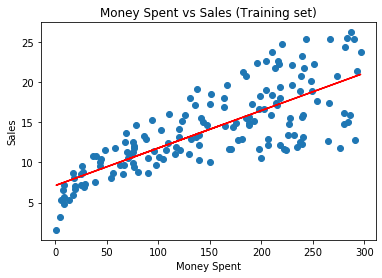

In [23]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.predict(x_train), color="red")
plt.title('Money Spent vs Sales (Training set)')
plt.xlabel('Money Spent')
plt.ylabel('Sales')
plt.tight_layout

## Visualise the test set results

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

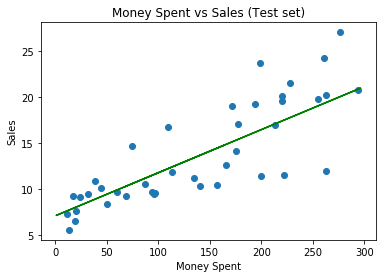

In [24]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title('Money Spent vs Sales (Test set)')
plt.xlabel('Money Spent')
plt.ylabel('Sales')
plt.tight_layout

## Model Evaluation

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred)).round(2)
rmse

3.26

In [27]:
#R-squared
r2=lr.score(x_train,y_train)
r2.round(2)

0.6

## Option2 - Train the simple linear regression model on training set using statsmodel

In [28]:
import statsmodels.api as sm

In [29]:
original_data = pd.read_csv("Advertising.csv")
original_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
X = original_data["TV"]
Y = original_data["sales"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state = 101)

X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     234.3
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           5.11e-33
Time:                        17:01:26   Log-Likelihood:                -416.22
No. Observations:                 160   AIC:                             836.4
Df Residuals:                     158   BIC:                             842.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1224      0.524     13.582      0.0

# Multiple Linear Regression

In [31]:
original_data = pd.read_csv("Advertising.csv")

# To read the top 5 entries of the database
original_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [32]:
data = original_data.drop(columns="Unnamed: 0")

In [33]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


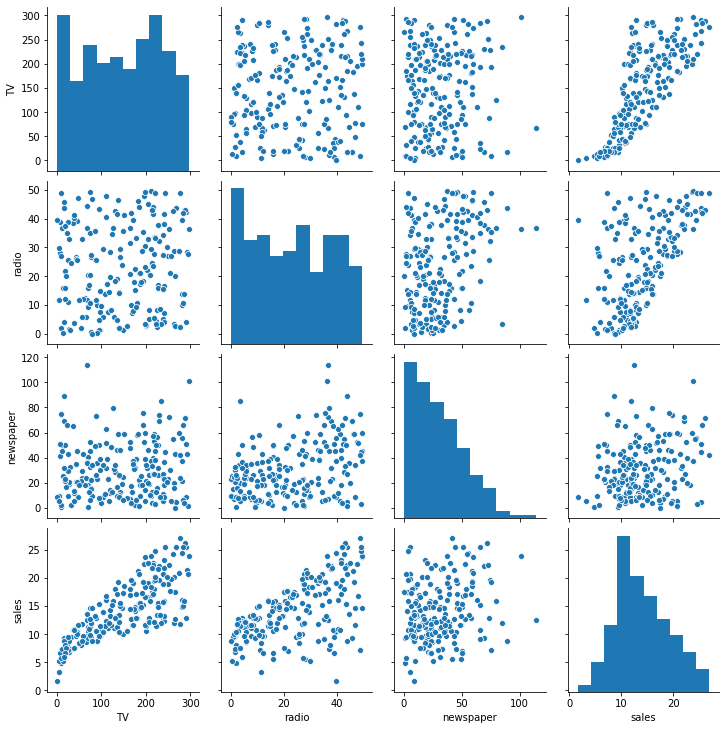

In [34]:
sns.pairplot(data=data)

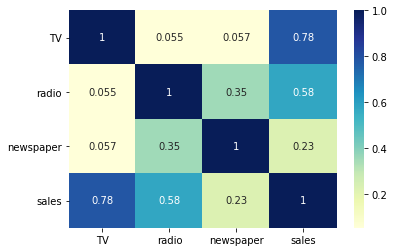

In [35]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

In [36]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [37]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [38]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

## Split the Dataset into training set and test set

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [40]:
x.shape

(200, 3)

In [41]:
x_train.shape

(160, 3)

## Option - Train the multiple linear regression model on training set using scikit

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the test set results

In [43]:
intercept = lr.intercept_.round(2)
intercept

3.02

In [44]:
coefficient = lr.coef_.round(2)
coefficient.reshape(1,3)

array([[ 0.05,  0.19, -0.01]])

In [45]:
coefficient_summary = pd.DataFrame(coefficient.reshape(1,3),columns=data.columns[:-1], index=["Coefficients"])
coefficient_summary
coefficient_summary["Intercept"] = intercept
coefficient_summary

,TV,radio,newspaper,Intercept
Coefficients,0.05,0.19,-0.01,3.02


In [46]:
y_test_pred = lr.predict(x_test)
y_test_pred

array([23.34555529, 21.88704827, 17.09438303, 12.29798531,  9.95627705,
        4.47192373, 13.61965335, 15.33926873,  9.67554829, 22.89642256,
       20.48668522, 19.96039217,  6.63021594, 23.00683162,  7.61789139,
       10.0577811 , 20.76718146, 18.73663558, 12.52344438,  7.7078238 ,
       19.93397639, 15.39591963, 20.86619445, 14.30628461, 18.73048116,
       19.32813979, 10.66043815,  7.96250344, 15.44623794, 17.18805615,
       10.53017819, 16.46278779, 15.96018299, 16.78559256, 15.18654701,
       14.26362548,  8.83165632,  6.52438522, 15.22556491,  8.89955476])

In [47]:
y_train_pred = lr.predict(x_train)
y_train_pred

array([12.47992676,  8.52097723, 12.41329342, 18.04685239, 10.56799816,
        9.89829495, 13.38273846, 12.7365214 , 12.85964369, 17.07822736,
       20.73759858, 24.1340517 , 11.85611646,  9.11132857, 11.74858896,
       13.03720325, 20.53541029, 17.34060348, 15.44542862, 12.68111774,
        3.8145411 ,  9.13871537, 11.73058347, 24.06034633, 13.95034159,
       15.6162496 ,  8.70674652,  7.79705664, 21.76131611,  8.55894235,
       10.04506645,  6.58070958, 12.45875128, 21.61785179, 17.43431393,
        8.22214865, 10.20254848,  7.07663288, 20.08070213, 12.39692319,
       21.26680345, 23.63765926, 16.16734031, 15.45408482,  9.85525086,
       24.87748407, 15.1357436 , 19.48544303,  4.42534282, 16.56039205,
       11.99604128, 14.2569646 , 11.32391851, 11.80603744, 22.52662884,
       17.44097394, 15.43672556,  3.55605834, 11.180643  , 18.44024268,
        9.97393552,  8.13332474, 14.39486056,  6.08521622, 23.2081942 ,
       14.5981406 , 20.88844867,  6.12539862, 12.40073972, 17.55

## Model Evaluation

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred)).round(2)
rmse

1.53

In [50]:
#R-squared
r2=lr.score(x_train,y_train)
r2.round(2)

0.91

In [51]:
# Adjusted R-squared

# adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

# n = number of observations

# p = number of predictors

x_train.shape
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2.round(2)

0.91

## Option - Train the multiple linear regression model on training set using statsmodels

In [52]:
import statsmodels.api as sm

In [53]:
original_data = pd.read_csv("Advertising.csv")
data = original_data.drop(columns="Unnamed: 0")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [54]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [55]:
X = data[['TV', 'radio', 'newspaper']]
Y = data["sales"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train,X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     407.6
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           1.43e-73
Time:                        17:01:32   Log-Likelihood:                -312.30
No. Observations:                 160   AIC:                             632.6
Df Residuals:                     156   BIC:                             644.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3673      0.390      6.069      0.0